<a href="https://colab.research.google.com/github/DavidPachis/dataScience/blob/main/tree/main/taller1/notebooks/Copy_of_taller1_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Análisis de datos

MINE-4101: Applied Data Science  
Univerisdad de los Andes
David Augusto Vásquez Pachón  
código: 201512574  
Dataset: Spotify data /(Data_Taller_1.csv)
  
Last update: August 30, 2022

# Librerías e importaciones
Se instaló la libreria de esta manera debido a que desde el comando tradicional, se estaban generando errores al momento de hacer el profile.

In [4]:
#!pip install --upgrade pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 140 kB/s
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 39.6 MB/s 
     |████████████████████████████████| 4.7 MB 39.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.2 MB/s 
     |████████████████████████████████| 296 kB 49.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.0-py2.py3-none-any.whl size=268032 sha256=8c58efea6426eba43c0101a7c7bb82bc6b8581b8a7df4ed9ebe68f402fcae756
  Stored in directory: /tmp/pip-ephem-wheel-cache-i43mc_ey/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a3ceff96e1bba51fb193321c7babc10d17f9c66cb4f021900d2c7eaafd83be5d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [5]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

from pandas_profiling import ProfileReport
# This line is to see graphs's outputs below cells 
%matplotlib inline

# Punto 1 
Para entender el conjunto de datos de una forma rápida, y posteriormente entrar a un análisis más profundo, se utilizó pandas profiling. Esta libreria nos permite ver de manera gráfica y rápida el comportamiento del conjunto de datos que se está analizando.

Por parte de la limpieza de los datos, se corrigieron caracteres de comillas dobles, los cuales se repetian a lo largo de varias filas, en columnas que tenían valores multiples por registro, ya sean varios strings o valores numéricos. 
Esa limpieza se centró en reeplazar y eliminar esas comillas, y dejar las comillas pertinentes para conservar los valores múltiples de las columnas. 
también se corrigen los nombres de genero y se desagregan las columnas de valores multiples. 



In [7]:
# Pandas configuration for extending the number of rows and columns,
#to visualize if not limit set parameter to None or -1
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [90]:
# Loading the CSV file as dataframe

url = 'https://raw.githubusercontent.com/DavidPachis/dataScience/main/taller1/data/Data_Taller_1_v3.csv'
spoti_df = pd.read_csv(url,quotechar="'",on_bad_lines='skip')

In [91]:
# Showing dataframe dimensions
spoti_df.shape

(1999, 18)

In [92]:
# Showing column types
spoti_df.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                  int64
popularity          float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre;               object
dtype: object

In [93]:
# Showing first rows
spoti_df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre;
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop;
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop;"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country;"
3,Bon Jovi,It!s My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal;"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop;


In [94]:
spoti_df = spoti_df.rename({'genre;': 'genre'}, axis=1)
spoti_df.head(2)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop;
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop;"


In [95]:
spoti_df['genre'] = spoti_df['genre'].str.replace(';','')
spoti_df.head(3)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,"pop, country"


In [116]:
#spoti_df['genre']=spoti_df['genre'].str.split(",", n=4,expand=True)
temp=spoti_df['genre'].str.split(",", n=4,expand=True)
temp.columns = ['genre{}'.format(x+1) for x in temp.columns]
spoti_df =spoti_df.join(temp)

In [117]:
spoti_df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre1,genre2,genre3,genre4
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,pop,None,None,None
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",rock,pop,None,None
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",pop,country,None,None
3,Bon Jovi,It!s My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",rock,metal,None,None
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,pop,None,None,None


In [14]:
ProfileReport(spoti_df)

In [15]:
#corr = spoti_df.corr()
#corr.style.background_gradient(cmap='coolwarm')

## **Conclusiones punto 1:**
En cuanto a problemas de calidad de los datos, se encontro que el archivo tenia comillas para separar una cadena de multiples valores de texto, como nombres de artistas y generos. El caso en que varias columnas tuvieran valores multiples, la fila se encerraba de nuevo en comillas dobles, por esta razón de remplazaron dichos caracteres, por una comilla sencilla en los casos de valor multiple, para poder leer los datos con pandas. 

El conjunto de datos, cuenta con 18 campos, de los cuales:

**categoricas nominales**: Artist, song, explicit, genre. 

**categoricas ordinales**: mode.

**cuantitativas discretas**: year, key,

**cuantitativas continuas**: duration_ms, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo.


# Punto 1(hay 2 unos)
Para desarrollar este punto primero vamos a sacar los registros duplicados del dataset pasado, para poder hacer un análisis sin sesgos, luego limitar el datafram a 10 años atras. 
Agrupe por artista sumando el numero de canciones que tiene cada artista y
al final se hace un top de los artistas con más canciones en los ultimos 10 años. 

In [17]:
spoti_df=spoti_df.drop_duplicates()
len(spoti_df)

1940

In [18]:
last10years=spoti_df.loc[spoti_df['year'] >=2012]
len(last10years)

796

In [19]:
last10years.head(3)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
29,Chicane,Don!t Give Up,210786.0,False,2016,47.0,0.644,0.720,10,-9.635,0,0.0419,0.00145,0.504,0.0839,0.530,132.017,Dance/Electronic
46,Samantha Mumba,Gotta Tell You,201946.0,False,2018,43.0,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.000,0.1660,0.774,109.981,pop
115,Faithless,We Come 1 - Radio Edit,222435.0,False,2015,53.0,0.645,0.903,5,-10.587,0,0.0441,0.00188,0.799,0.1470,0.610,135.977,"pop, Dance/Electronic"


In [20]:
p1=last10years.groupby(by='artist').count()['song']
p1_10=p1.sort_values(ascending=False).head(10)
p1_10

artist
Calvin Harris    18
Drake            16
Ariana Grande    13
David Guetta     13
Taylor Swift     13
Katy Perry       11
Avicii            9
Maroon 5          9
Ed Sheeran        9
One Direction     9
Name: song, dtype: int64

Text(0.5, 1.0, 'top 10 de artistas más activos de los últimos 10 años')

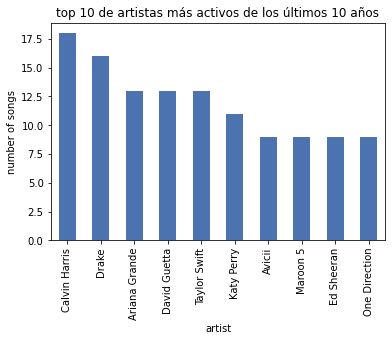

In [136]:
p1_10.plot(kind='bar')
plt.xlabel('artist')
plt.ylabel('number of songs')
plt.title('top 10 de artistas más activos de los últimos 10 años')

# Punto 2
Se encontró que la diferencia de medias es 7.491209375000011, los tiempos de duracion de las caciones son muy similares, lo más diferenciador es la cantidad outliers que se encuentra en el genero latin. 


In [157]:
#latin=spoti_df.loc[(spoti_df['genre1'] =='latin')|(spoti_df['genre2'] =='latin')|(spoti_df['genre3'] =='latin')|(spoti_df['genre4'] =='latin')]
#folk= spoti_df.loc[(spoti_df['genre1'] =='Folk/Acoustic')|(spoti_df['genre2'] =='Folk/Acoustic')|(spoti_df['genre3'] =='Folk/Acoustic')|(spoti_df['genre4'] =='Folk/Acoustic')]
latin = spoti_df[spoti_df['genre'].str.contains("latin")==True]
folk = spoti_df[spoti_df['genre'].str.contains("Folk/Acoustic")==True]

In [174]:
mean_la=latin['duration_ms']/1000
mean_fo=folk['duration_ms']/1000
print('la diferencia de medias es',mean_la.mean()-mean_fo.mean())
data=[mean_fo,mean_la]

la diferencia de medias es 7.491209375000011


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Folk And Latin')

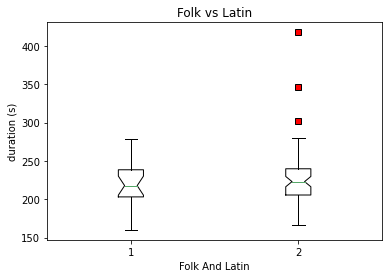

In [171]:
fig1, ax1 = plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax1.set_title('Folk vs Latin')
ax1.boxplot(data,notch=True,flierprops=red_square)
plt.ylabel('duration (s)')
plt.xlabel('Folk And Latin')

# Punto 3
Se hacen las agrupaciones por género todos incluidos, que tengan las canciones, debido a que si se desagregan los generos, no se puede tener top 5, debido a que solo se tiene en algunos casos 4 generos por top,si contemplamos como principal el primer genero que registran los datos. en la primera celda se muestra el ejemplo. 

genre1
pop                 43
hip hop             37
latin                6
Dance/Electronic     1
set()                1
Name: song, dtype: int64


Text(0.5, 1.0, 'top 5 de artistas 2000')

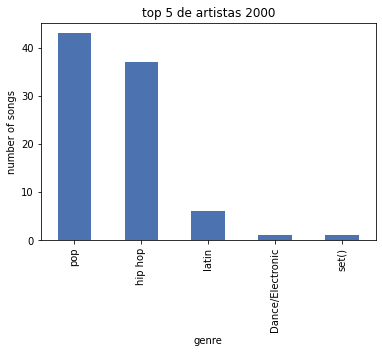

In [262]:
anio_2019_g1=spoti_df.loc[spoti_df['year'] ==2019]
p3_2019_g1=anio_2019_g1.groupby(by='genre1').count()['song']
p3_2019_g1=p3_2019_g1.sort_values(ascending=False).head(5)
print(p3_2019_g1.head(5))
p3_2019_g1.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2000')

Text(0.5, 1.0, 'top 5 de artistas 2000')

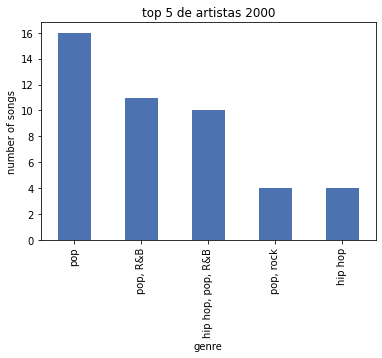

In [264]:
anio_2000=spoti_df.loc[spoti_df['year'] ==2000]
p3_2000=anio_2000.groupby(by='genre').count()['song']
p3_2000=p3_2000.sort_values(ascending=False).head(5)
p3_2000.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2000')

Text(0.5, 1.0, 'top 5 de artistas 2005')

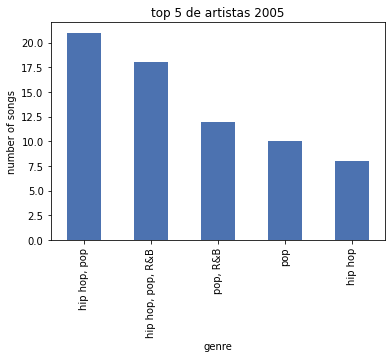

In [265]:
anio_2005=spoti_df.loc[spoti_df['year'] ==2005]
p3_2005=anio_2005.groupby(by='genre').count()['song']
p3_2005=p3_2005.sort_values(ascending=False).head(5)
p3_2005.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2005')

Text(0.5, 1.0, 'top 5 de artistas 2010')

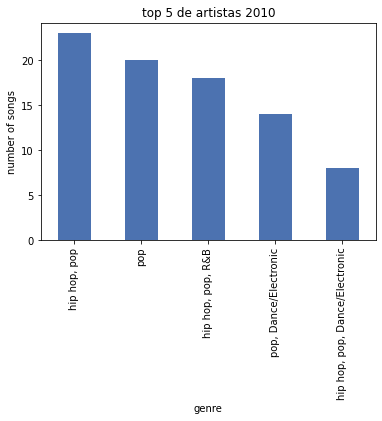

In [255]:
anio_2010=spoti_df.loc[spoti_df['year'] ==2010]
p3_2010=anio_2010.groupby(by='genre').count()['song']
p3_2010=p3_2010.sort_values(ascending=False).head(5)
p3_2010.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2010')

Text(0.5, 1.0, 'top 5 de artistas 2015')

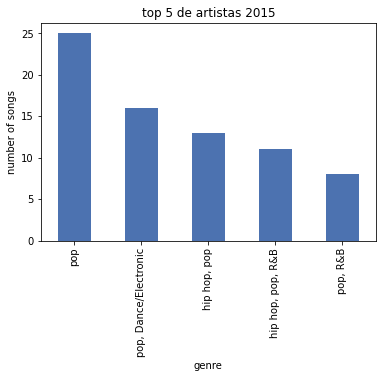

In [256]:
anio_2015=spoti_df.loc[spoti_df['year'] ==2015]
p3_2015=anio_2015.groupby(by='genre').count()['song']
p3_2015=p3_2015.sort_values(ascending=False).head(5)
p3_2015.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2015')

Text(0.5, 1.0, 'top 5 de artistas 2019')

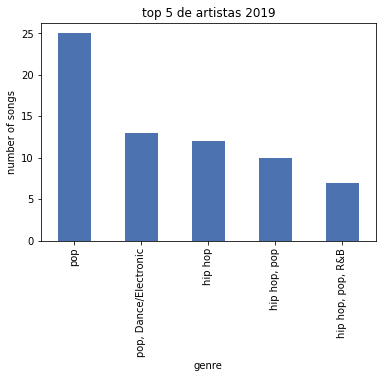

In [263]:
anio_2019=spoti_df.loc[spoti_df['year']==2019]
p3_2019=anio_2019.groupby(by='genre').count()['song']
p3_2019=p3_2019.sort_values(ascending=False).head(5)

p3_2019.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.title('top 5 de artistas 2019')


## conclusiones punto 3
El género de hip hop fue el mas recurrente durante estos años, junto con el pop, debido a que siempre están presentes en los tops de canciones de la data. 
También hay aspectos destacables como que el 2005 fue aumenta la cantidad de hip hop en generos, y el el 2015 y 2019 el pop y dance/elecrronic son los que tienen la mayoe cantidad de canciones. 

#Punto 4  


In [292]:
#p4=spoti_df.drop(['duration_ms','explicit','genre','genre1','genre2','genre2','genre3','genre4','popularity', 'danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'],axis=1)
p4= spoti_df.groupby(["artist","year"]).count()
p4

song  duration_ms  explicit  popularity  danceability  energy  \
artist    year                                                                  
*NSYNC    2000     2            2         2           1             2       2   
          2001     2            2         2           2             2       2   
112       2001     2            2         2           2             2       2   
2 Chainz  2013     1            1         1           1             1       1   
          2017     1            1         1           1             1       1   
...              ...          ...       ...         ...           ...     ...   
iann dior 2019     2            2         2           2             2       2   
iio       2006     1            1         1           1             1       1   
t.A.T.u.  2020     1            1         1           1             1       1   
will.i.am 2007     1            1         1           1             1       1   
          2013     3            3         3           3             3       3   

                key  loudness  mode  speechiness  acousticness  \
artist    year                                                   
*NSYNC    2000    2         2     2            2             2   
          2001    2         2     2            2             2   
112       2001    2         2     2            2             2   
2 Chainz  2013    1         1     1            1             1   
          2017    1         1     1            1             1   
...             ...       ...   ...          ...           ...   
iann dior 2019    2         2     2            2             2   
iio       2006    1         1     1            1             1   
t.A.T.u.  2020    1         1     1            1             1   
will.i.am 2007    1         1     1            1             1   
          2013    3         3     3            3             3   

                instrumentalness  liveness  valence  tempo  genre  genre1  \
artist    year                                                              
*NSYNC    2000                 2         2        2      2      2       2   
          2001                 2         2        2      2      2       2   
112       2001                 2         2        2      2      2       2   
2 Chainz  2013                 1         1        1      1      1       1   
          2017                 1         1        1      1      1       1   
...                          ...       ...      ...    ...    ...     ...   
iann dior 2019                 2         2        2      2      2       2   
iio       2006                 1         1        1      1      1       1   
t.A.T.u.  2020                 1         1        1      1      1       1   
will.i.am 2007                 1         1        1      1      1       1   
          2013                 3         3        3      3      3       3   

                genre2  genre3  genre4  
artist    year                          
*NSYNC    2000       0       0       0  
          2001       0       0       0  
112       2001       2       2       0  
2 Chainz  2013       1       0       0  
          2017       1       0       0  
...                ...     ...     ...  
iann dior 2019       2       0       0  
iio       2006       0       0       0  
t.A.T.u.  2020       0       0       0  
will.i.am 2007       1       0       0  
          2013       3       0       0  

[1391 rows x 20 columns]

## punto 5
Como se muestra en la gráfica, se ve una variabilidad general en todos los generos, exepto en el metal, el cual tiene un auge desde 2004 hasta el 2019. 
En este punto solo se graficaron los generos que estaban en primer lugar de las canciones. 
tambien se ve que el mas estable es el easy listening a lo largo de los anios. 


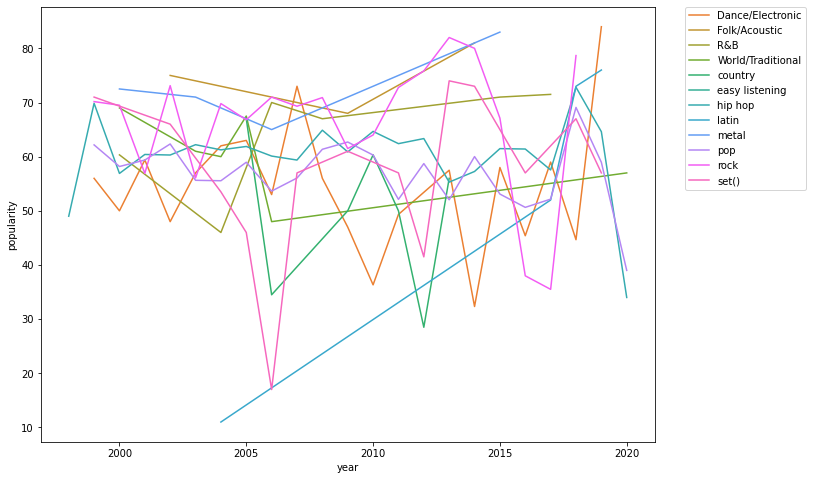

In [306]:
p5 = spoti_df.groupby(["genre1","year"], as_index=False)['popularity'].mean()
p5 = p5[p5['popularity']>5]

plt.figure(figsize = (11, 8))
sns.lineplot(y="popularity",x="year",data=p5, hue="genre1",legend=True,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Punto 6


In [313]:
rock = spoti_df[spoti_df['genre'].str.contains("rock")==True]
rock_Ener = rock["energy"].mean()
rock_Val= rock["valence"].mean()
rockTempo = (rock["tempo"].mean()/1000)/120

In [315]:
pop = spoti_df[spoti_df['genre'].str.contains("pop")==True]
pop_Ener= pop["energy"].mean()
pop_Val = pop["valence"].mean()
popTempo = (pop["tempo"].mean()/1000)/120

Text(0.5, 1.0, 'Diference rock and pop')

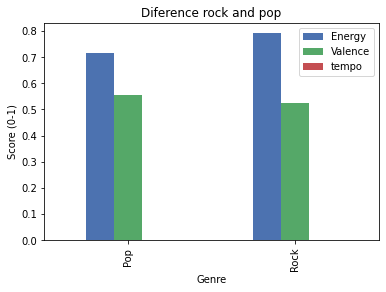

In [316]:
h = {"Genre":["Pop","Rock"], "Energy":[pop_Ener,rock_Ener], "Valence":[pop_Val,rock_Val],"tempo":[popTempo,rockTempo]}
punto6 = pd.DataFrame(data=h)
punto6.plot(x="Genre",kind = "bar")
plt.ylabel("Score (0-1)")
plt.xlabel("Genre")
plt.title("Diference rock and pop")

## Punto 7 
Top 5 de artistas con canciones mas enérgicas, en los años 2019 y 2020, pre y post pandemia? 

In [311]:
ener_2019=spoti_df.loc[spoti_df['year']==2019]
ener_2020=spoti_df.loc[spoti_df['year']==2020]
ener_2019=ener_2019.groupby(by='artist').sum()['energy']
ener_2020=ener_2020.groupby(by='artist').sum()['energy']
p7_2019=ener_2019.sort_values(ascending=False).head(5)
p7_2020=ener_2019.sort_values(ascending=False).head(5)

p7_2019

artist
Post Malone      2.476
Ed Sheeran       2.372
Lil Nas X        1.743
Mabel            1.684
Ariana Grande    1.666
Name: energy, dtype: float64